In [1]:
#Importing necessary liabiries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Importing csv file
import os
os.chdir("C:\\Users\\Ashish\Desktop\The-Discovery-of-Handwashing\Dataset")
os.listdir('.')

['After Handwashing.jpeg',
 'Before Handwashing.jpeg',
 'Clinic 1 - Number of Deaths per year.jpeg',
 'Clinic 2 - Number of Deaths per year.jpeg',
 'Handwashing effect.jpeg',
 'monthly_deaths_by_clinic.csv',
 'Motarlity rate of clinic 1 and 2.jpeg',
 'yearly_deaths_by_clinic.csv']

In [3]:
#Reading yearly dataset
yearly_df = pd.read_csv('yearly_deaths_by_clinic.csv')

In [4]:
#Print out yealry dataframe
yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [5]:
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [6]:
yearly_df.shape

(12, 4)

In [7]:
#Grouping clinic by deaths to know the numbers of deaths clinic 1 and 2 sepertaly
yearly_df.groupby('clinic')['deaths'].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

In [8]:
#Grouping clinic by births to know numbers of bir in clinic 1 and 2 sepertaly
yearly_df.groupby('clinic')['births'].sum()

clinic
clinic 1    20042
clinic 2    17791
Name: births, dtype: int64

The above results shows us the number of births and deaths in 2 clinics from the year 1841 till 1846. It's obvious that the number of deaths in clinic 1 is higher than that of clinic 2.

In [9]:
#To make analysis easier, let's calculate the proportion of deaths by adding new column
yearly_df["proportion of deaths"] = yearly_df["deaths"] / yearly_df["births"]

In [10]:
#Print out yearly dataframe
yearly_df

,year,births,deaths,clinic,proportion of deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [11]:
#Separating the dataset into 2 datasets, one for each clinic
clinic_1 = yearly_df[yearly_df["clinic"] == "clinic 1"]
clinic_2 = yearly_df[yearly_df["clinic"] == "clinic 2"]                     

In [12]:
#Print out clinic 1
clinic_1

,year,births,deaths,clinic,proportion of deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [13]:
#Print out clinic 2
clinic_2

,year,births,deaths,clinic,proportion of deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


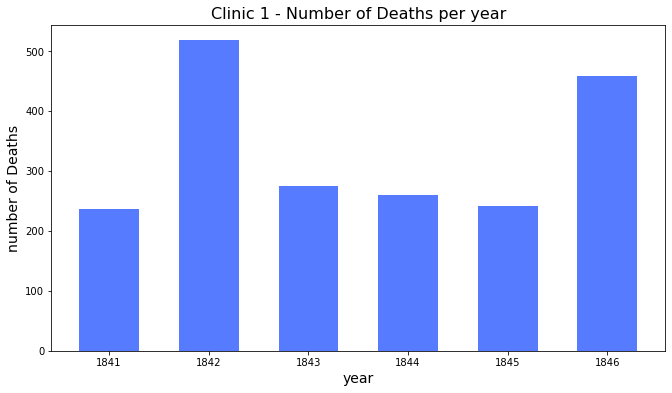

In [14]:
#Visualizing the number of deaths every year in clinic 1
fig,ax = plt.subplots(figsize = (11,6))
plt.bar(clinic_1.year, clinic_1.deaths, width = 0.6, color='#567BFF')
plt.title('Clinic 1 - Number of Deaths per year', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('number of Deaths', fontsize=14)
plt.savefig('Clinic 1 - Number of Deaths per year.jpeg')

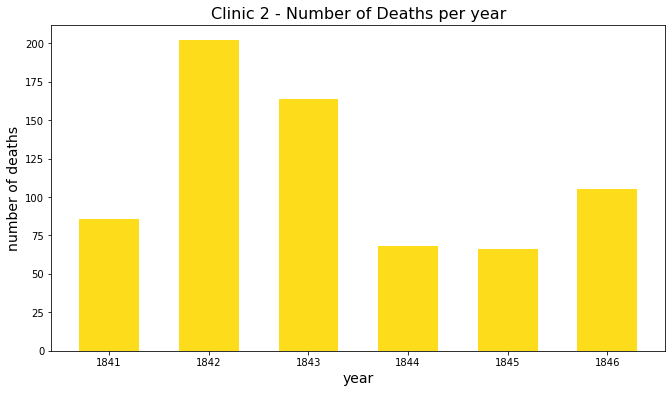

In [15]:
#Visualizing the number of deaths every year in clinic 2
fig,ax = plt.subplots(figsize= (11,6))
plt.bar(clinic_2.year, clinic_2.deaths, width = 0.6, color='#FDDC1B')
plt.title('Clinic 2 - Number of Deaths per year', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('number of deaths', fontsize=14)
plt.savefig('Clinic 2 - Number of Deaths per year.jpeg')

It seems that 1842 was hectic year in both clinic 1 & clinic 2, where the number of deaths were 518 and 202 respectively.

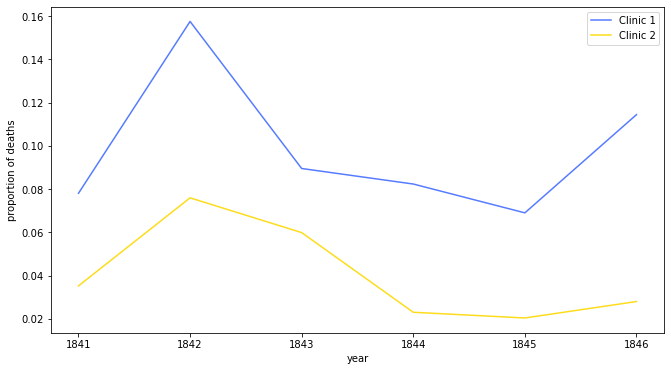

In [16]:
#Lets see the proportion of deaths in clinic 1 and 2 in one plot
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(x='year', y='proportion of deaths', data=clinic_1, label='Clinic 1', color='#567BFF', ax=ax)
sns.lineplot(x='year', y='proportion of deaths', data=clinic_2, label='Clinic 2',color='#FDDC1B', ax=ax)
plt.savefig('Motarlity rate of clinic 1 and 2.jpeg')

We can see clearly the death mortality of clinic 1 is much higher than clinic 2, where medical students were working, Also part of their study and spend a lot of time in the autopsy room, dealing with corpses (bacteria). Where in clinic 2 midwives weren't.

After realizing this, Dr Semmelweis immediately ordered the doctors to wash their hands and made it obligatory in the summer of 1847 to see if that will affect the number of deaths.

 Since we have the monthly data, now we can trace the number of deaths before and after the handwashing started.

In [17]:
#Reading monthly dataset
monthly_df = pd.read_csv('monthly_deaths_by_clinic.csv')

In [18]:
#Print out monthly dataframe
monthly_df

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [19]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [20]:
#calculate the proportion of deaths per month
monthly_df['proportion of deaths']=monthly_df['deaths']/monthly_df['births']
monthly_df.head(5)

,date,births,deaths,proportion of deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [21]:
#change the data type of "date" column from string to datetime
monthly_df.dtypes
monthly_df['date'] = pd.to_datetime(monthly_df['date'])

In [22]:
#label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

#split monthly into before and after handwashing_start
bw=before_washing = monthly_df[monthly_df['date'] < start_handwashing]
aw=after_washing = monthly_df[monthly_df['date'] >= start_handwashing]

## Before Handwashing

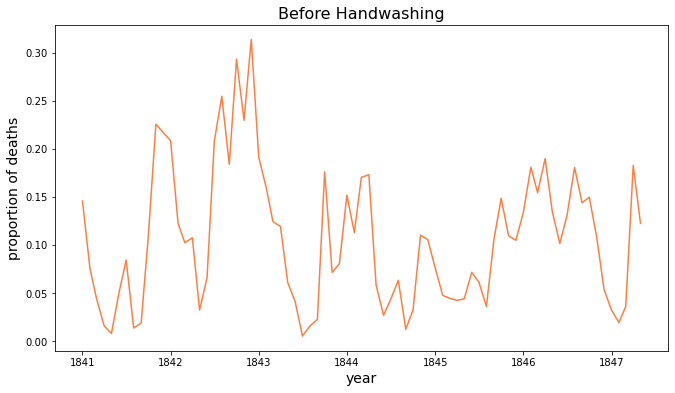

In [23]:
fig,ax = plt.subplots(figsize=(11,6))
x = before_washing['date']
y = before_washing['proportion of deaths']
plt.plot(x,y, color='#FC7E41')
plt.title('Before Handwashing', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('proportion of deaths', fontsize=14)
plt.savefig('Before Handwashing.jpeg')

## After Handwashing

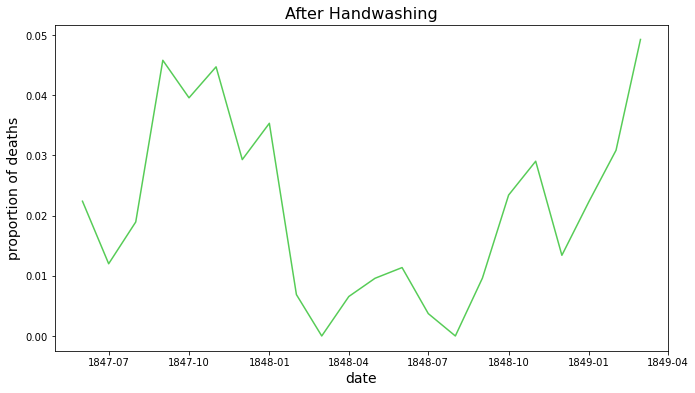

In [24]:
fig,ax = plt.subplots(figsize=(11,6))
x = after_washing['date']
y = after_washing['proportion of deaths']
plt.plot(x,y, color='#57CC57')
plt.title('After Handwashing', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('proportion of deaths', fontsize=14)
plt.savefig('After Handwashing.jpeg')

To see the effect of handwashing, let's combine the both plots in one chart. 

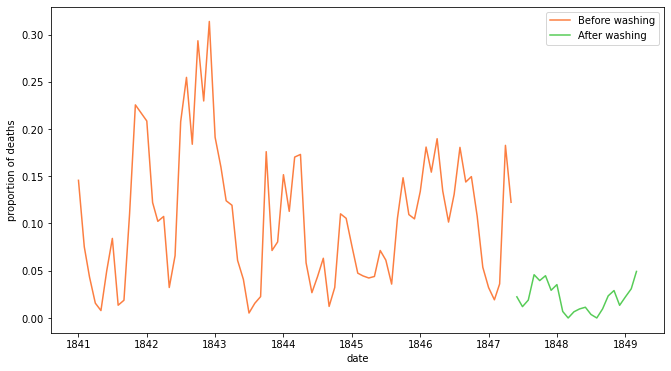

In [25]:
fig, ax = plt.subplots(figsize=(11,6))
sns.lineplot(x='date', y='proportion of deaths', data=bw, label='Before washing', color='#FC7E41', ax=ax)
sns.lineplot(x='date', y='proportion of deaths', data=aw, label='After washing',color='#57CC57', ax=ax)
plt.savefig('Handwashing effect.jpeg')

We can see the difference clearly, the proportion of deaths dramatically decresed after handwashing was made obligatory.

In [26]:
#Let's calculate exactly how much did handwashing decreased the proportion of deaths on average.
before_proportion = before_washing['proportion of deaths']
after_proportion = after_washing['proportion of deaths']

In [27]:
before_proportion.mean()

0.10504998260908793

In [28]:
after_proportion.mean()

0.021093375097254535

In [29]:
#Calaculting the differce between both proportions
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

The minus sign indicate that there is a decrease. So handwashing decreased the proportion of deaths from 10% to 2% i.e, by approximately 8%.